## Problem Statement: Life Insurance Data
    
The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high performing agents and upskill programs for low performing agents.

**Importing Libraries**

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

**READ DATA**

In [308]:
insurance_df = pd.read_excel('Sales.xlsx',sheet_name='Sales')
insurance_df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


**BASIC INFO**

In [309]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [310]:
insurance_df.dtypes.value_counts()

object     8
float64    7
int64      5
dtype: int64

In [311]:
print('There are {} records and {} columns'.format(insurance_df.shape[0],insurance_df.shape[1]))
print('There are {} duplicate records'.format(insurance_df.duplicated().sum()))

There are 4520 records and 20 columns
There are 0 duplicate records


**DESCRIPTIVE STATISTICS**

In [312]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


In [313]:
# 50% of AgentBonus is 3911.5, max - 9608.0
# Majority (75%) of customer age is 20 years, min is low as 2 and max is 58
# Majority (75%) of customer tenure is 20 yrs
# Around 50% of customers have monthly income as 21606.0
# Max ExistingPolicyTenure 25 yrs

In [314]:
insurance_df.select_dtypes('object').describe().T

,count,unique,top,freq
Channel,4520,3,Agent,3194
Occupation,4520,5,Salaried,2192
EducationField,4520,7,Graduate,1870
Gender,4520,3,Male,2688
Designation,4520,6,Manager,1620
MaritalStatus,4520,4,Married,2268
Zone,4520,4,West,2566
PaymentMethod,4520,4,Half Yearly,2656


**NULL VALUES CHECK**

In [315]:
print('Null value check:---------------')
null_df = pd.DataFrame({'Null_%':(insurance_df.isnull().sum()/insurance_df.index.size)*100}).sort_values('Null_%',ascending=False)
null_df

Null value check:---------------


,Null_%
Age,5.951327
MonthlyIncome,5.221239
CustTenure,5.000000
ExistingPolicyTenure,4.070796
SumAssured,3.407080
CustCareScore,1.150442
NumberOfPolicy,0.995575
Gender,0.000000
ExistingProdType,0.000000
Designation,0.000000


**OUTLIER CHECK**

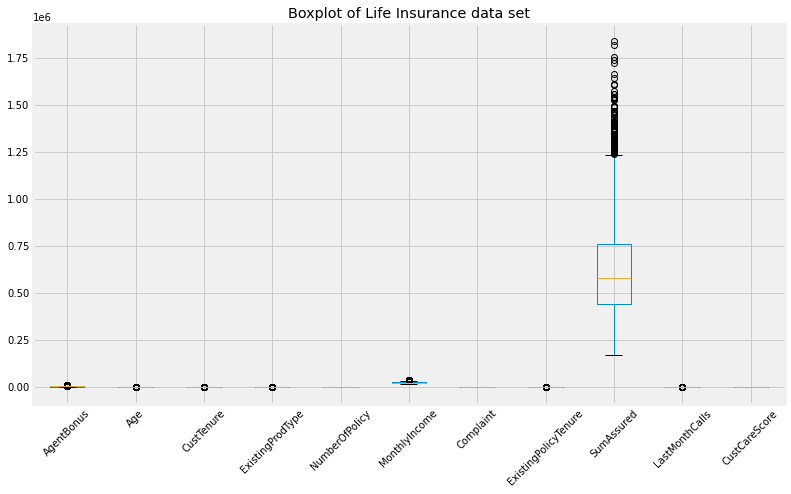

In [316]:
insurance_df.iloc[:,1:].boxplot(figsize=(12,7), rot=45);
plt.title('Boxplot of Life Insurance data set')
plt.show()

**UNIVARIATE ANALYSIS**

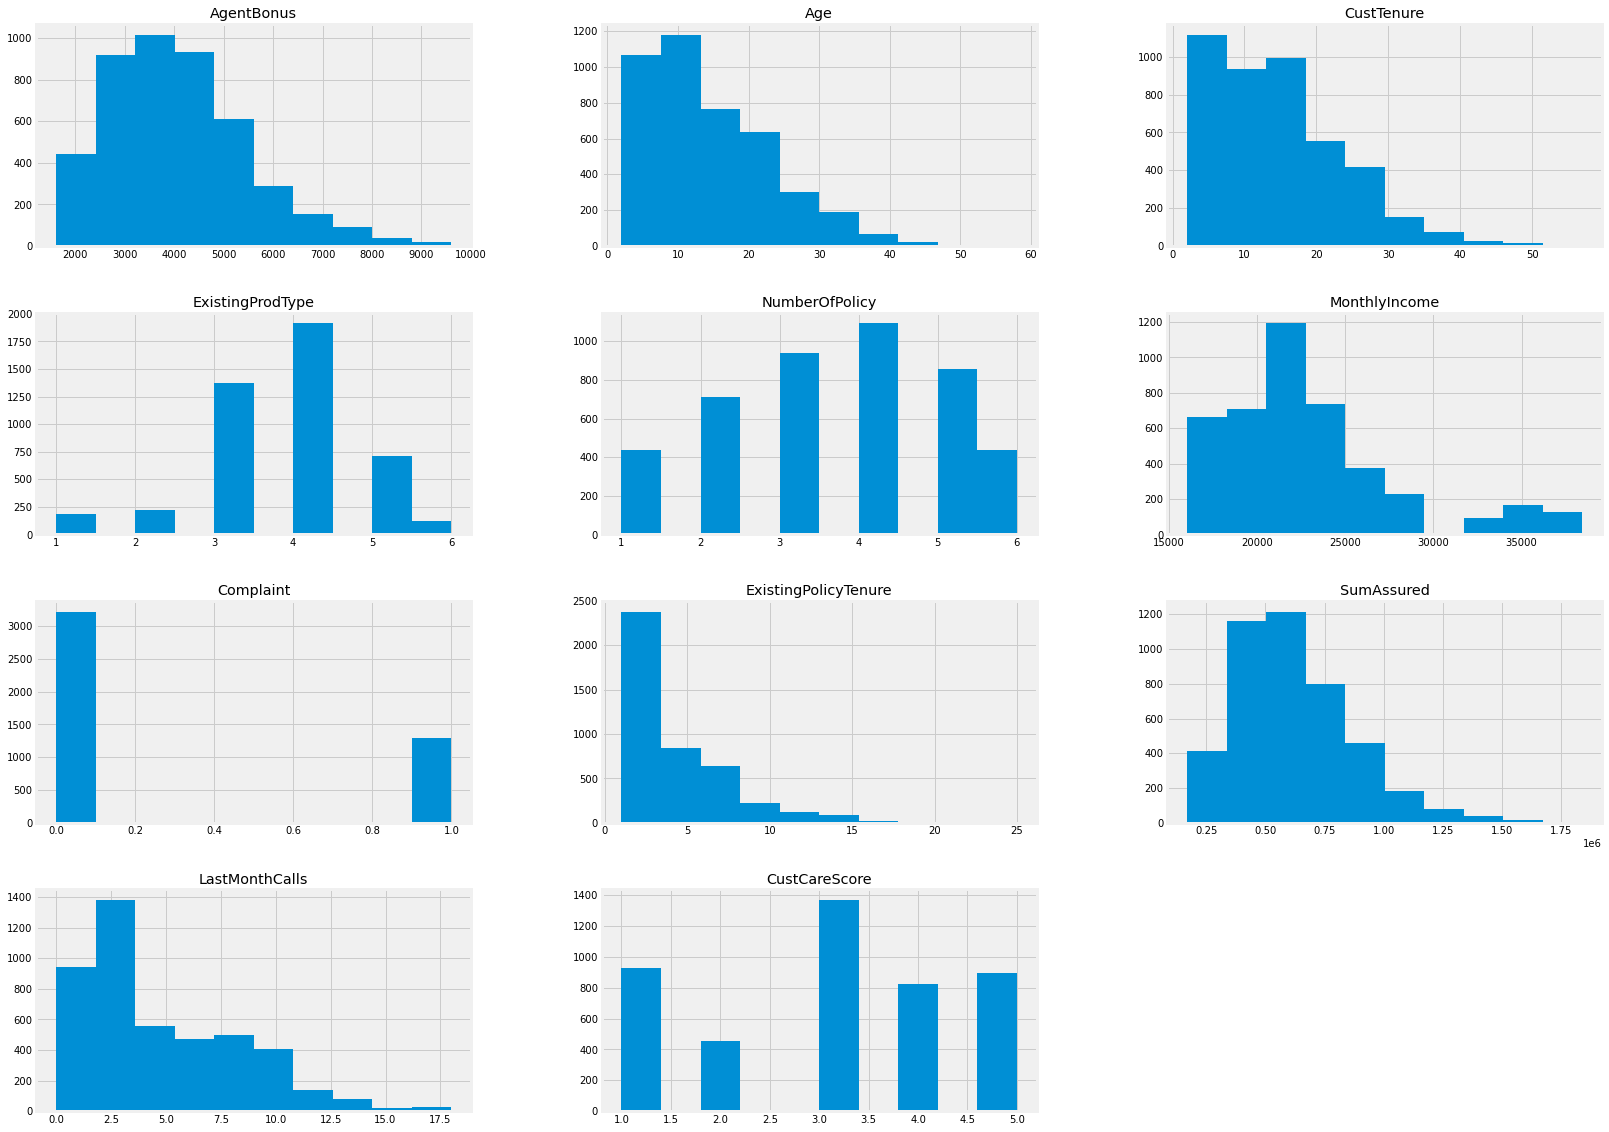

In [317]:
insurance_df.iloc[:,1:].hist(figsize=(25,20));

In [318]:
num_cols = []; obj_cols = []

for col in insurance_df.columns:
    if insurance_df[col].dtype.name != 'object':
        num_cols.append(col)
    else: 
        obj_cols.append(col)    

In [319]:
discrete_cols = ['ExistingProdType', 'ExistingPolicyTenure','NumberOfPolicy', 'Complaint', 'CustCareScore', 
                 'LastMonthCalls']

In [320]:
def univariate_analysis(df):
    
    print('**********************UNIVARIATE ANALYSIS FOR CONTINUOUS VARIABLES************************\n')
    for col in num_cols[1:]:
        if col not in discrete_cols:
            fig, axes = plt.subplots(nrows=1, ncols=2)
            fig.set_size_inches(15,5)

            print(col.upper())
            ax = sns.boxplot(df[col], ax=axes[0])
            ax.set_title('Boxplot')

            ax = sns.distplot(df[col], ax=axes[1])
            ax.set_title('Distribution plot')

            plt.show()
            print('\n--------------------------------------------------------------------------------------------------')
         
    
    print('**********************UNIVARIATE ANALYSIS FOR DISCRETE VARIABLES************************\n')
    for col in discrete_cols:
        plt.figure(figsize=(10,5))
        print(col.upper(),'\t', df[col].nunique(),'\n')
        print(df[col].value_counts())
        sns.countplot(df[col],order=df[col].value_counts().index)
        plt.show()
        print('\n--------------------------------------------------------------------------------------------------')
        
    print('\n**********************UNIVARIATE ANALYSIS FOR OBJECT VARIABLES************************\n')
    for col in obj_cols:
        plt.figure(figsize=(10,5))
        print(col.upper(),'\t', df[col].nunique(),'\n')
        print(df[col].value_counts())
        sns.countplot(df[col],order=df[col].value_counts().index)
        plt.show()
        print('\n--------------------------------------------------------------------------------------------------')

**********************UNIVARIATE ANALYSIS FOR CONTINUOUS VARIABLES************************

AGENTBONUS


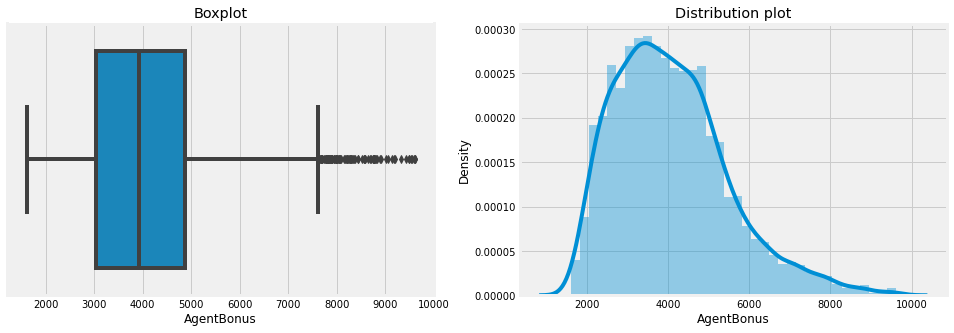


--------------------------------------------------------------------------------------------------
AGE


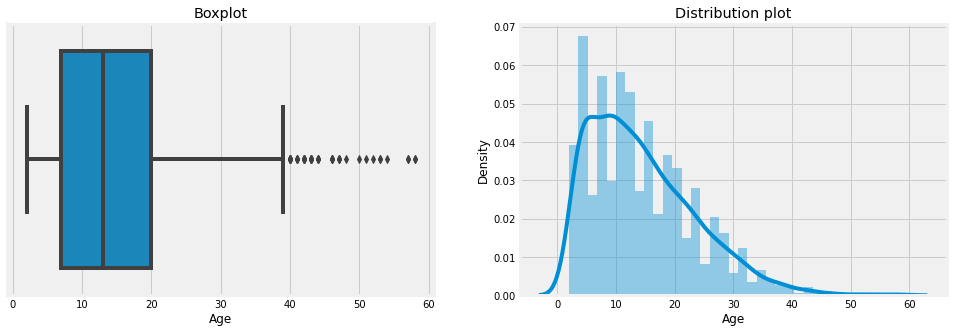


--------------------------------------------------------------------------------------------------
CUSTTENURE


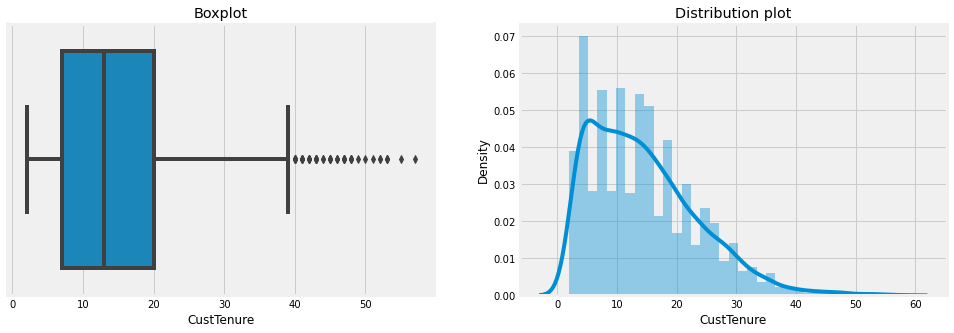


--------------------------------------------------------------------------------------------------
MONTHLYINCOME


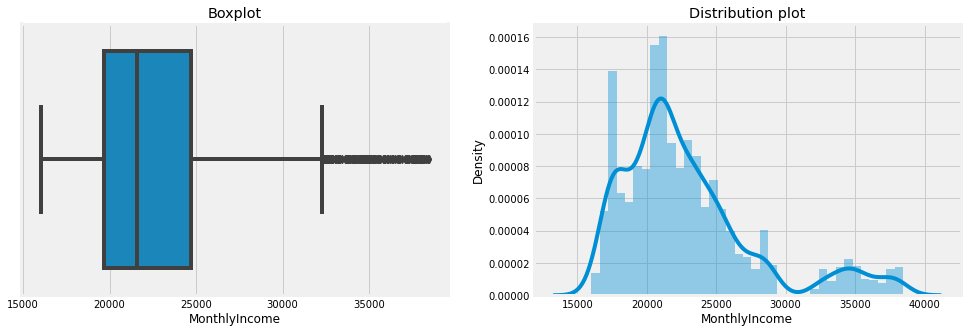


--------------------------------------------------------------------------------------------------
SUMASSURED


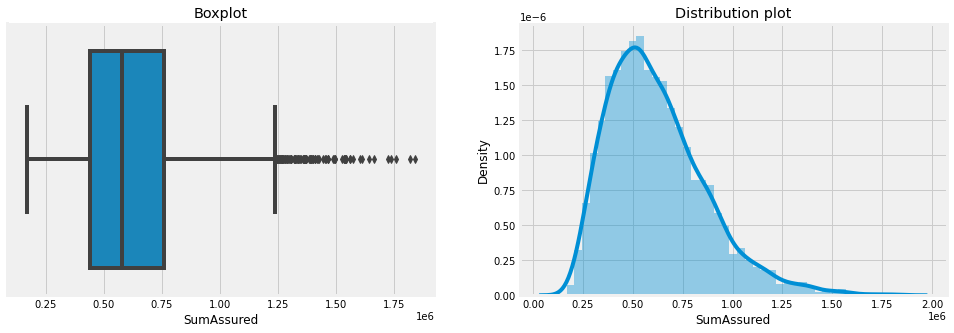


--------------------------------------------------------------------------------------------------
**********************UNIVARIATE ANALYSIS FOR DISCRETE VARIABLES************************

EXISTINGPRODTYPE 	 6 

4    1916
3    1369
5     708
2     221
1     183
6     123
Name: ExistingProdType, dtype: int64


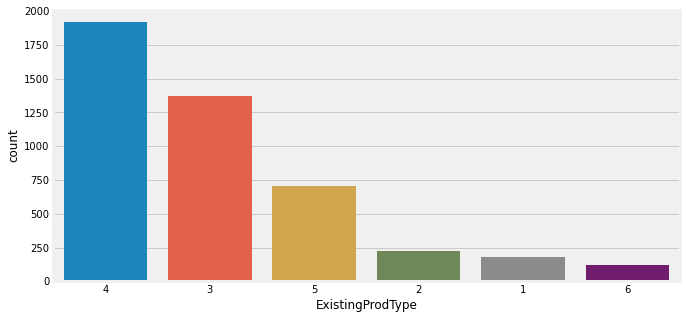


--------------------------------------------------------------------------------------------------
EXISTINGPOLICYTENURE 	 24 

1.0     990
2.0     837
3.0     554
4.0     460
5.0     381
6.0     263
7.0     194
8.0     180
9.0     132
10.0     93
11.0     65
12.0     56
13.0     39
14.0     36
16.0     20
15.0     16
17.0      6
18.0      4
20.0      3
22.0      2
19.0      2
25.0      1
23.0      1
21.0      1
Name: ExistingPolicyTenure, dtype: int64


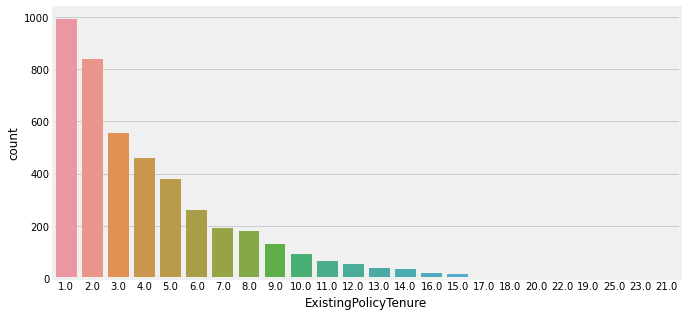


--------------------------------------------------------------------------------------------------
NUMBEROFPOLICY 	 6 

4.0    1094
3.0     939
5.0     856
2.0     711
1.0     438
6.0     437
Name: NumberOfPolicy, dtype: int64


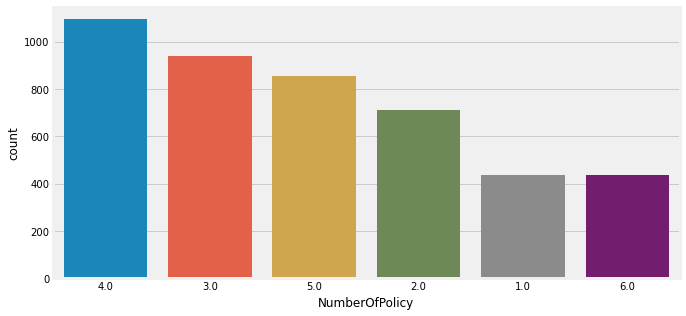


--------------------------------------------------------------------------------------------------
COMPLAINT 	 2 

0    3222
1    1298
Name: Complaint, dtype: int64


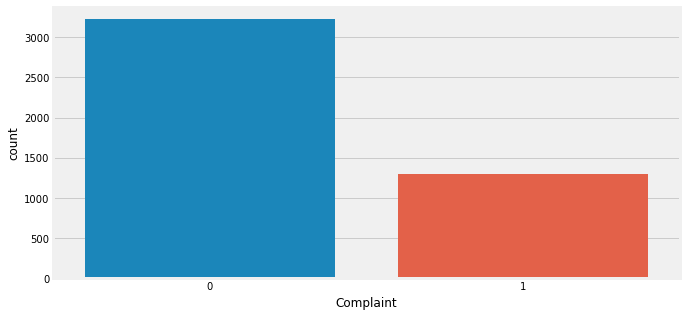


--------------------------------------------------------------------------------------------------
CUSTCARESCORE 	 5 

3.0    1367
1.0     928
5.0     893
4.0     826
2.0     454
Name: CustCareScore, dtype: int64


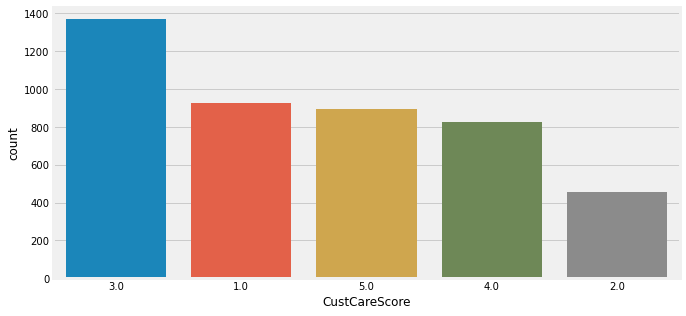


--------------------------------------------------------------------------------------------------
LASTMONTHCALLS 	 19 

3     733
2     647
1     532
8     497
0     408
7     377
4     357
9     263
5     199
10    141
6      97
11     76
12     61
13     51
14     30
17     15
15     14
18     12
16     10
Name: LastMonthCalls, dtype: int64


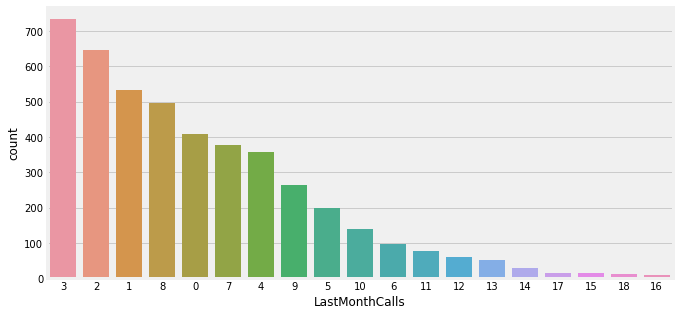


--------------------------------------------------------------------------------------------------

**********************UNIVARIATE ANALYSIS FOR OBJECT VARIABLES************************

CHANNEL 	 3 

Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64


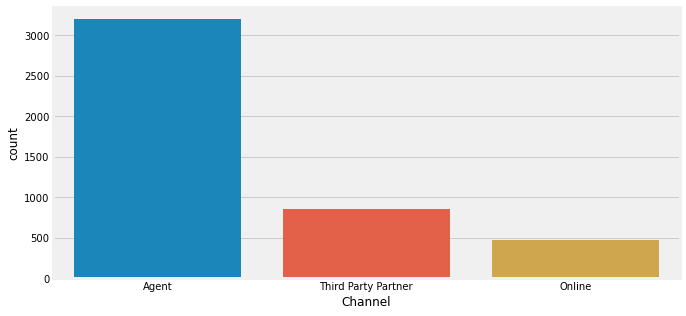


--------------------------------------------------------------------------------------------------
OCCUPATION 	 5 

Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: Occupation, dtype: int64


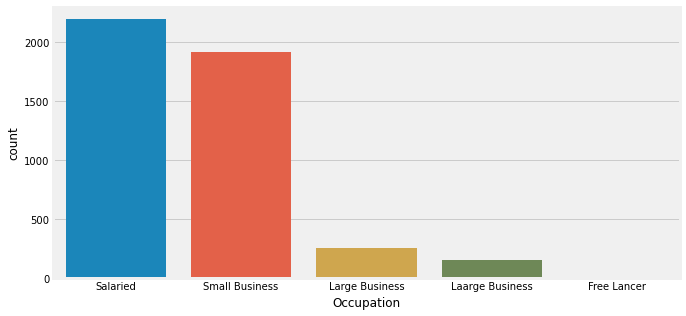


--------------------------------------------------------------------------------------------------
EDUCATIONFIELD 	 7 

Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: EducationField, dtype: int64


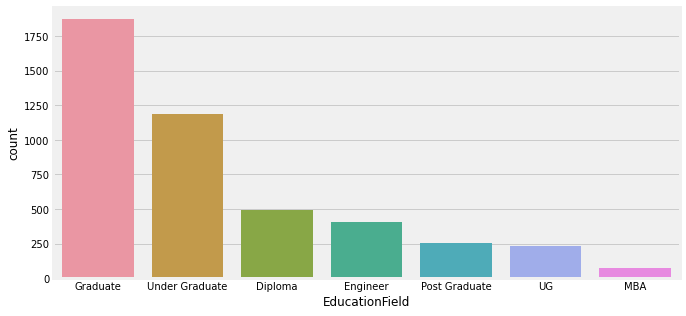


--------------------------------------------------------------------------------------------------
GENDER 	 3 

Male       2688
Female     1507
Fe male     325
Name: Gender, dtype: int64


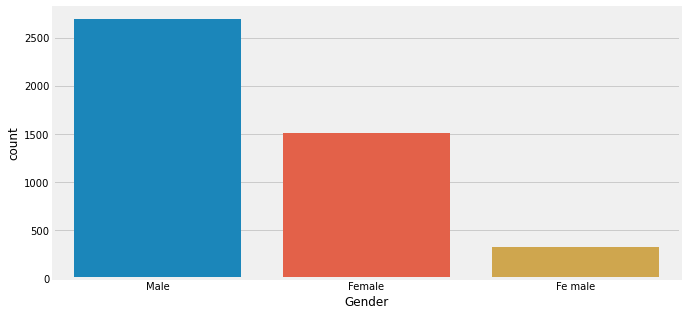


--------------------------------------------------------------------------------------------------
DESIGNATION 	 6 

Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64


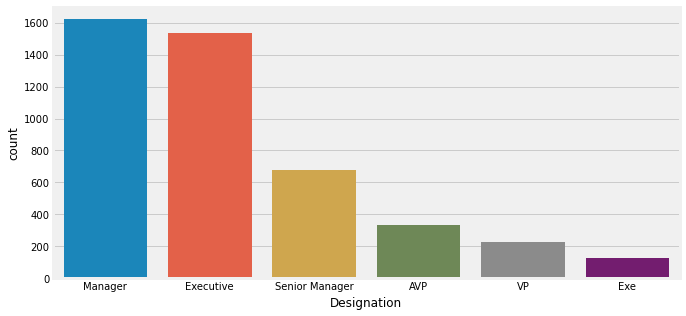


--------------------------------------------------------------------------------------------------
MARITALSTATUS 	 4 

Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: MaritalStatus, dtype: int64


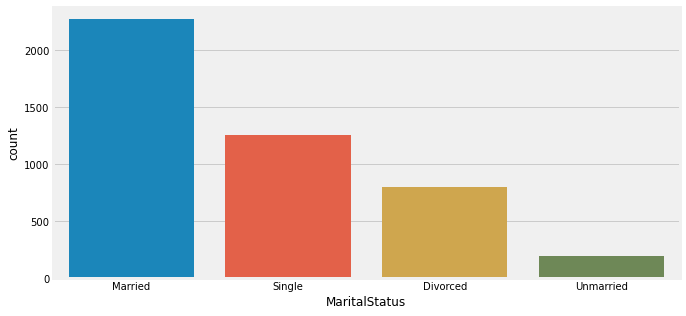


--------------------------------------------------------------------------------------------------
ZONE 	 4 

West     2566
North    1884
East       64
South       6
Name: Zone, dtype: int64


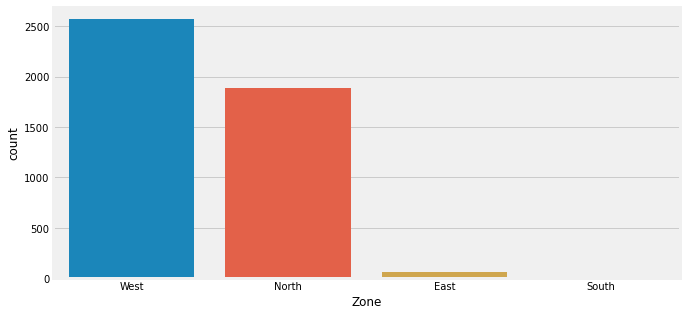


--------------------------------------------------------------------------------------------------
PAYMENTMETHOD 	 4 

Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: PaymentMethod, dtype: int64


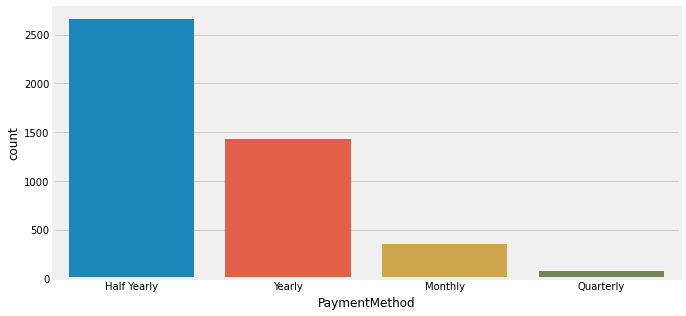


--------------------------------------------------------------------------------------------------


In [321]:
univariate_analysis(insurance_df)

In [322]:
insurance_df.sort_values('Age',ascending=True).head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
1176,7001176,1898,2.0,8.0,Agent,Small Business,UG,Fe male,1,Executive,3.0,Married,18978.0,0,2.0,318830.0,North,Monthly,2,5.0
536,7000536,2398,2.0,14.0,Agent,Salaried,Graduate,Female,3,Exe,3.0,Divorced,17132.0,1,2.0,NaN,West,Half Yearly,1,2.0
2841,7002841,2341,2.0,9.0,Third Party Partner,Salaried,Post Graduate,Male,4,Executive,4.0,Divorced,21278.0,0,5.0,395558.0,West,Half Yearly,3,3.0
4233,7004233,2307,2.0,9.0,Agent,Small Business,Under Graduate,Male,4,Executive,4.0,Single,20976.0,0,5.0,408403.0,North,Half Yearly,10,5.0
4218,7004218,2470,2.0,10.0,Agent,Small Business,Under Graduate,Female,5,Manager,4.0,Single,24701.0,0,1.0,417447.0,North,Yearly,4,3.0


***>>> Fixing some values (like spelling & redundant words)***

In [323]:
insurance_df['Occupation'] = insurance_df['Occupation'].replace({'Laarge Business':'Large Business'})

insurance_df['EducationField'] = insurance_df['EducationField'].replace({'UG': 'Under Graduate',
                                                                         'Engineer': 'Graduate',
                                                                         'MBA': 'Post Graduate'})

insurance_df['Gender'] = insurance_df['Gender'].replace({'Fe male': 'Female'})

insurance_df['Designation'] = insurance_df['Designation'].replace({'Exe': 'Executive'})

insurance_df['MaritalStatus'] = insurance_df['MaritalStatus'].replace({'Unmarried': 'Single'})


**BIVARIATE ANALYSIS**

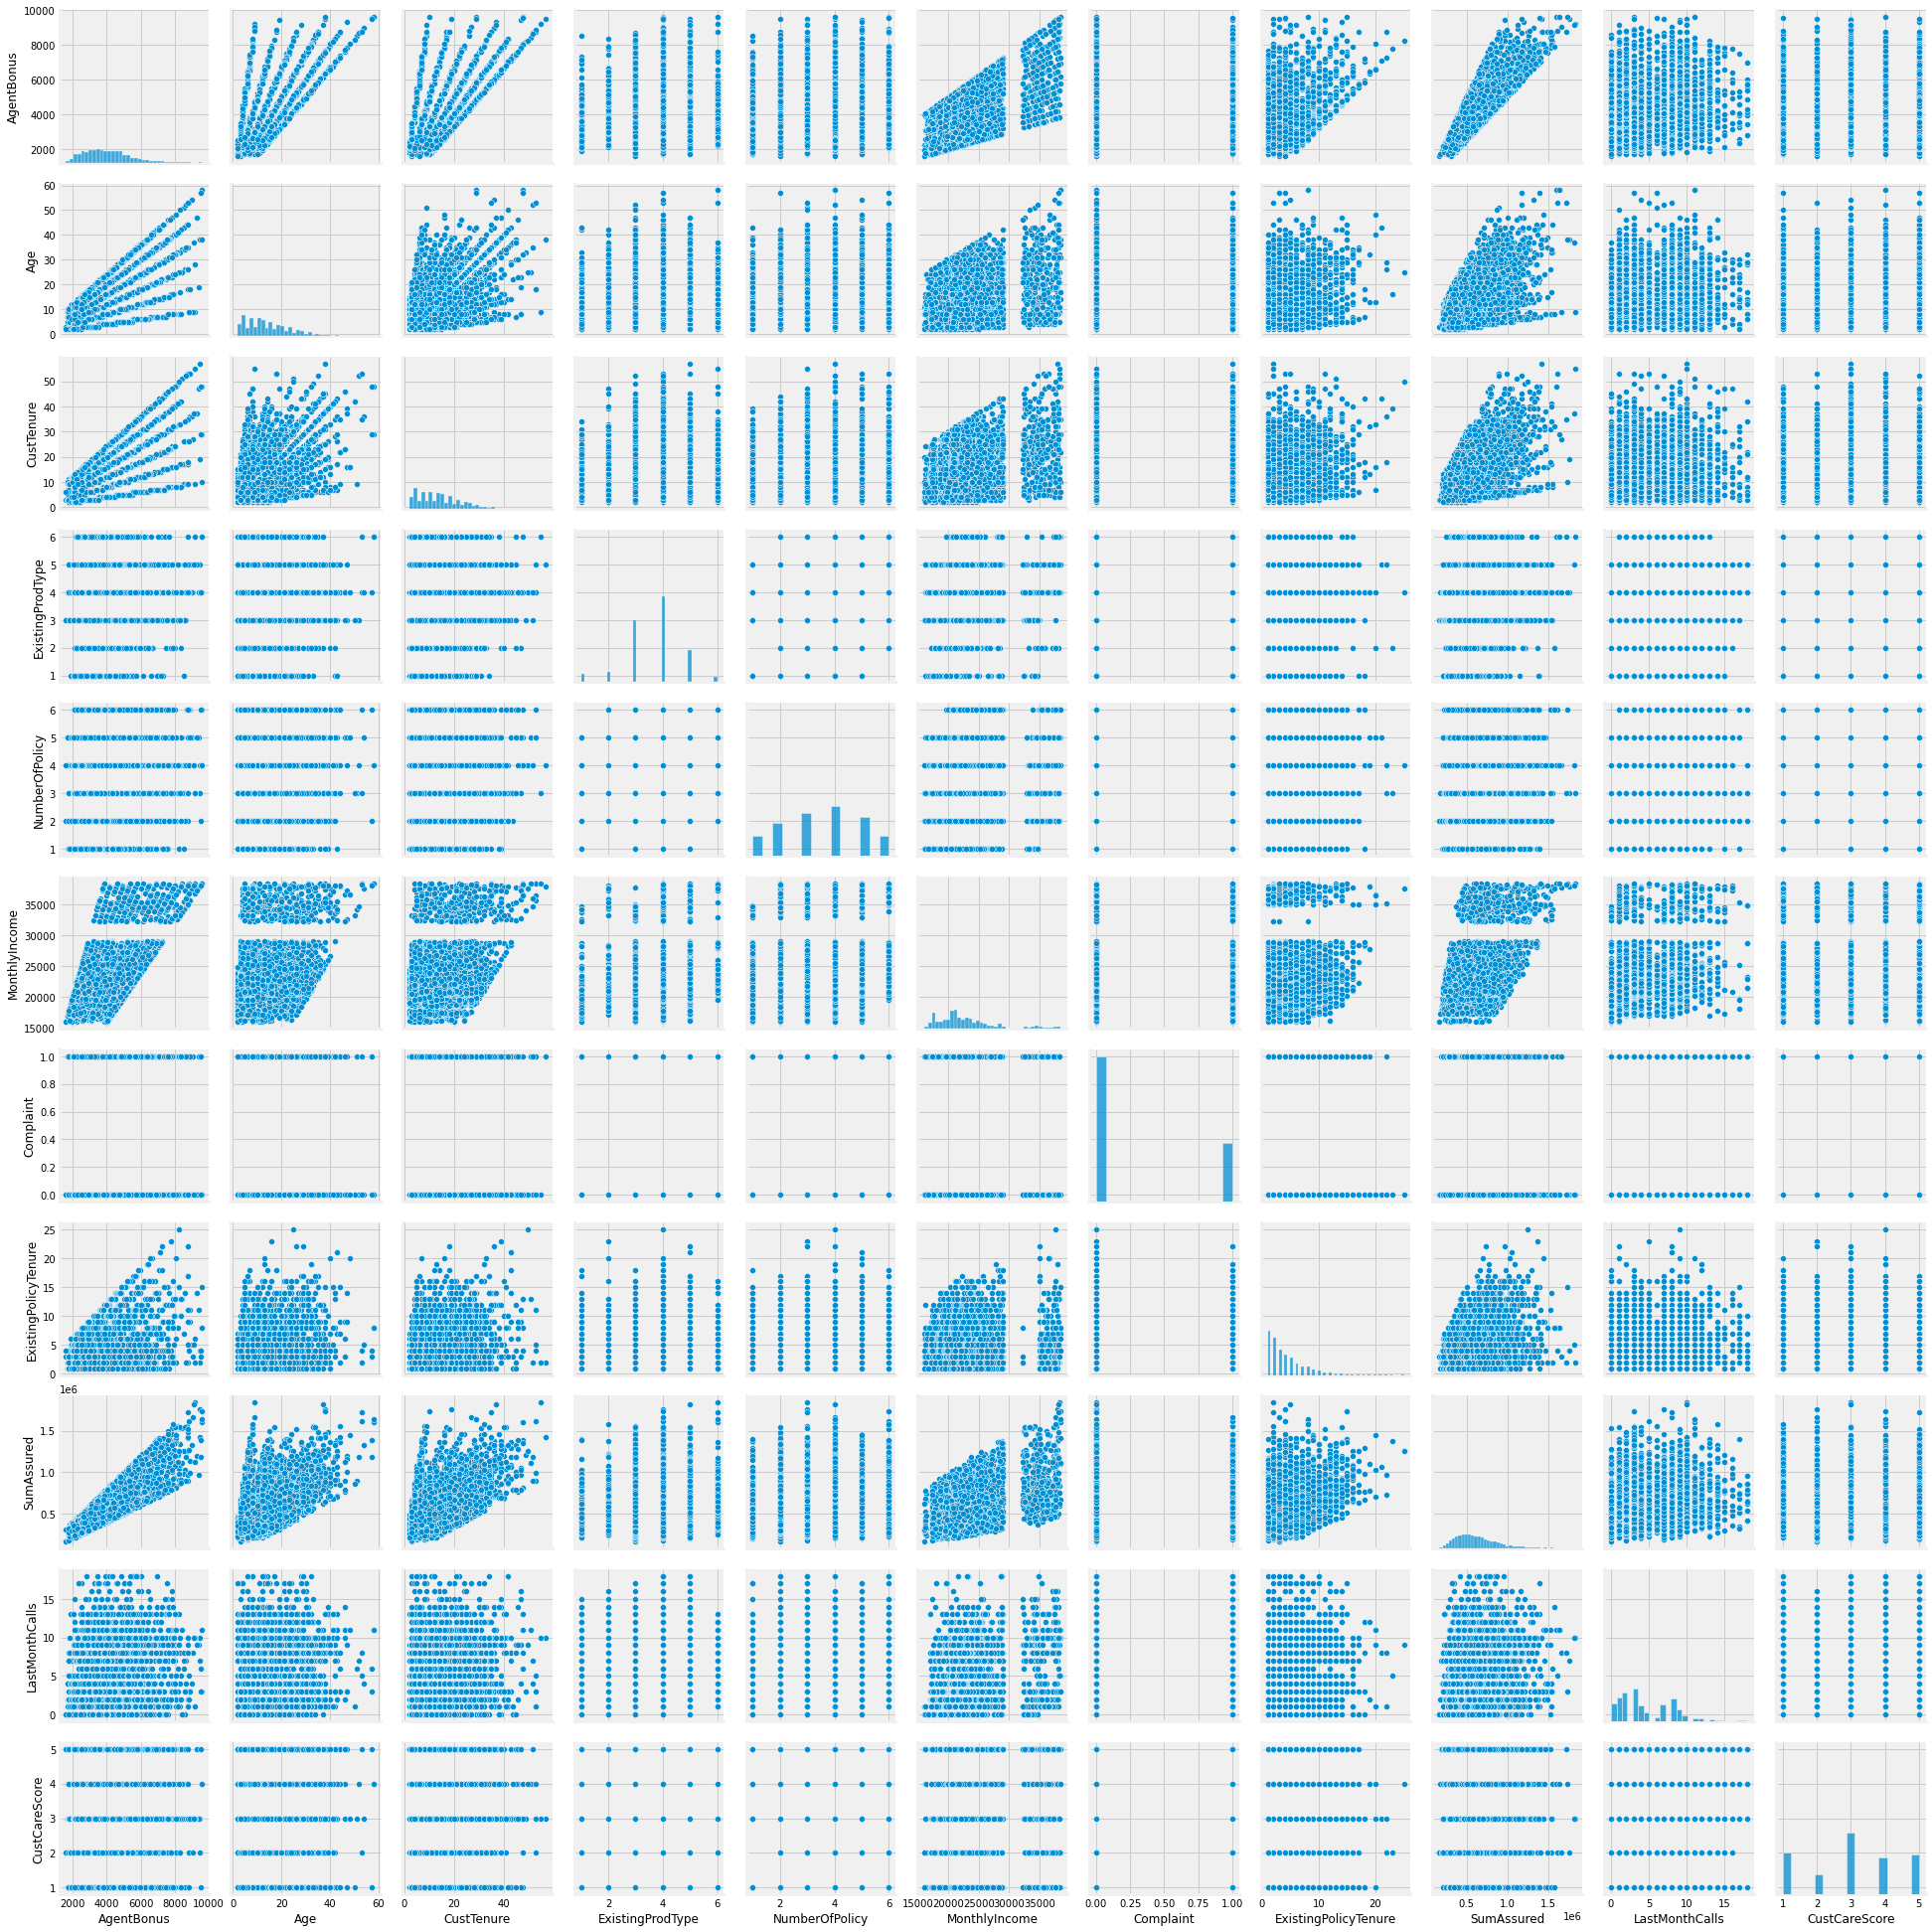

In [324]:
sns.pairplot(insurance_df.drop('CustID',axis=1));

In [325]:
def bivariate_analysis(df):
    print('\n**********************AGENT BONUS WITH NUMERIC VARIABLES************************\n')
    for col in num_cols[2:]:
        print('AGENTBONUS VS.', col.upper())
        sns.scatterplot(x = df['AgentBonus'], y = df[col]);
        plt.show()
        print('\n--------------------------------------------------------------------------------------------------')
        
    print('\n**********************AGENT BONUS WITH OBJECT VARIABLES************************\n')
    for col in obj_cols:
        plt.figure(figsize=(10,5))
        print('AGENTBONUS VS.', col.upper())
        sns.boxplot(x = df[col], y = df['AgentBonus']);
        plt.show()
        print('\n--------------------------------------------------------------------------------------------------')   


**********************AGENT BONUS WITH NUMERIC VARIABLES************************

AGENTBONUS VS. AGE


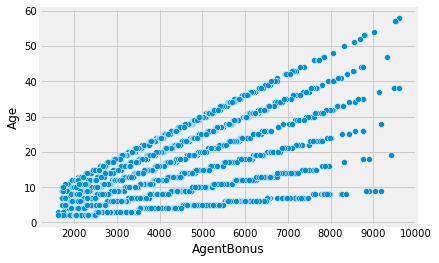


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. CUSTTENURE


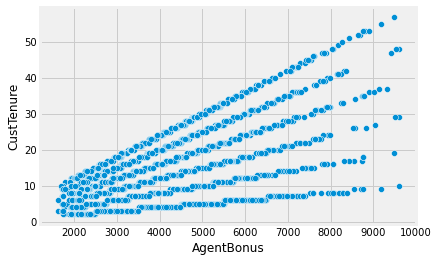


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. EXISTINGPRODTYPE


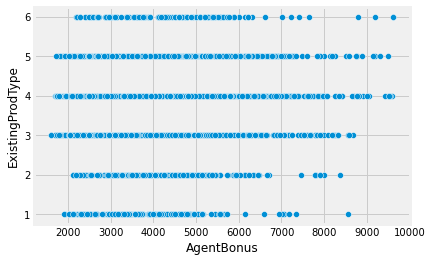


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. NUMBEROFPOLICY


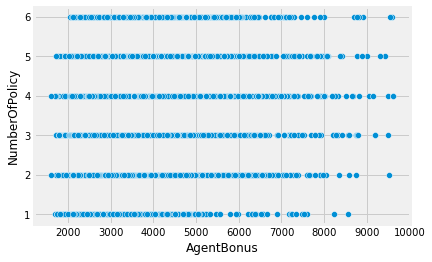


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. MONTHLYINCOME


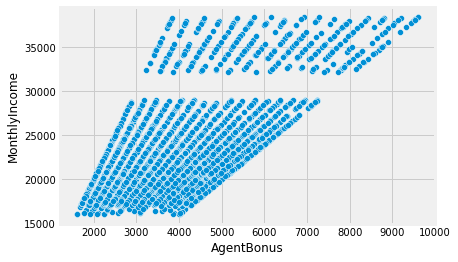


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. COMPLAINT


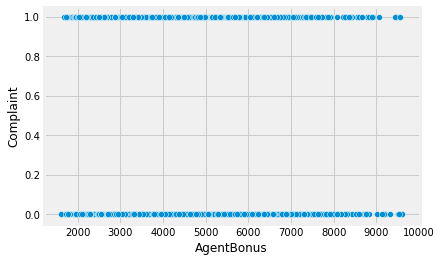


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. EXISTINGPOLICYTENURE


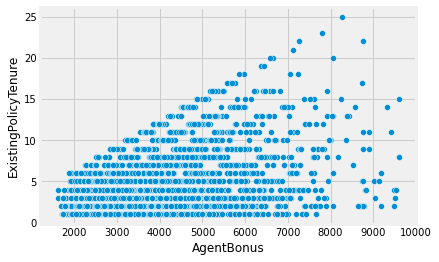


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. SUMASSURED


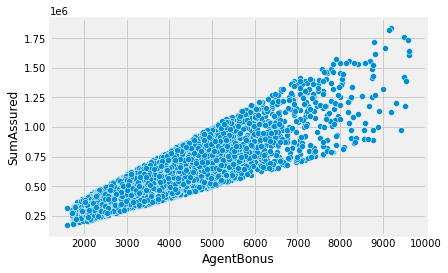


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. LASTMONTHCALLS


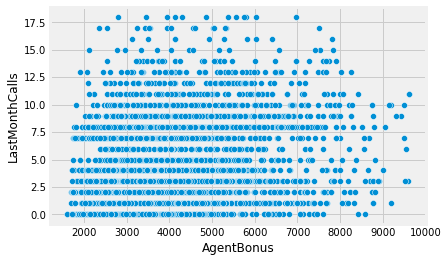


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. CUSTCARESCORE


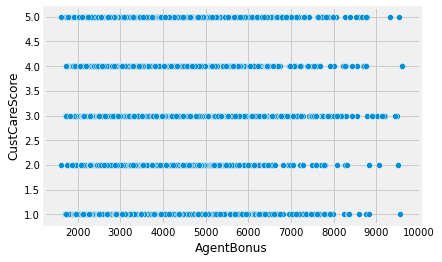


--------------------------------------------------------------------------------------------------

**********************AGENT BONUS WITH OBJECT VARIABLES************************

AGENTBONUS VS. CHANNEL


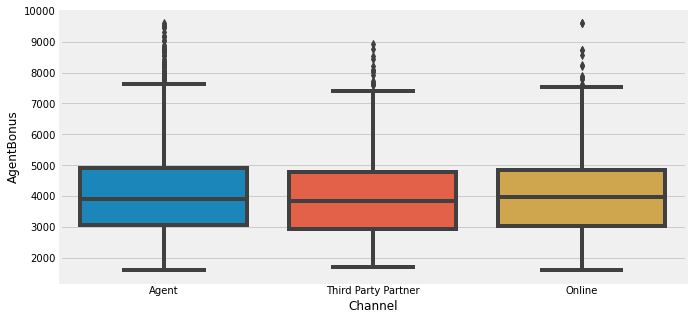


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. OCCUPATION


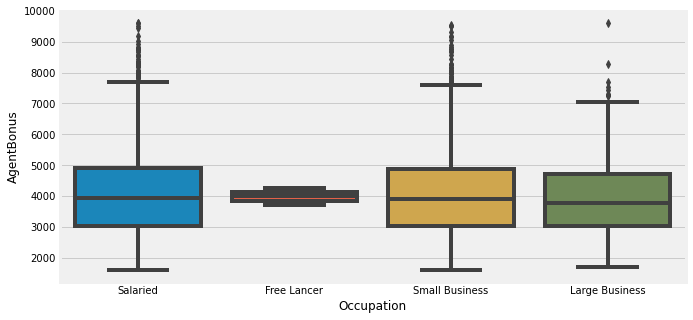


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. EDUCATIONFIELD


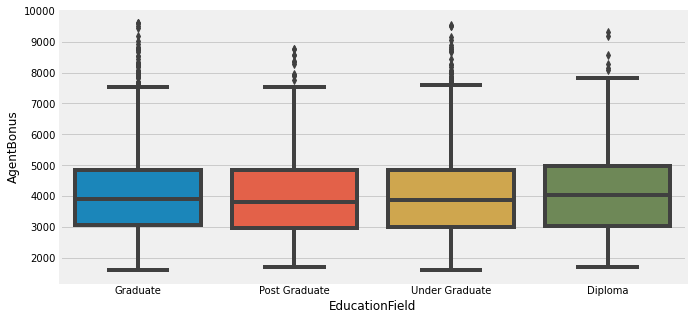


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. GENDER


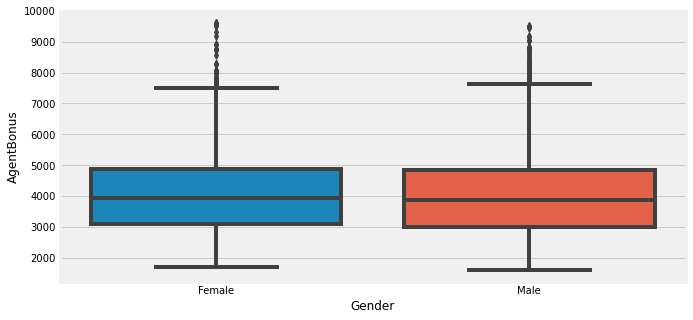


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. DESIGNATION


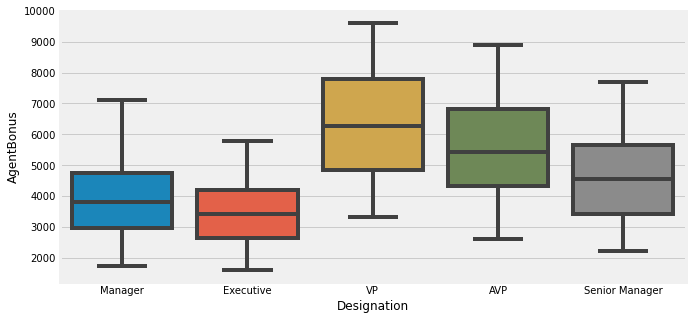


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. MARITALSTATUS


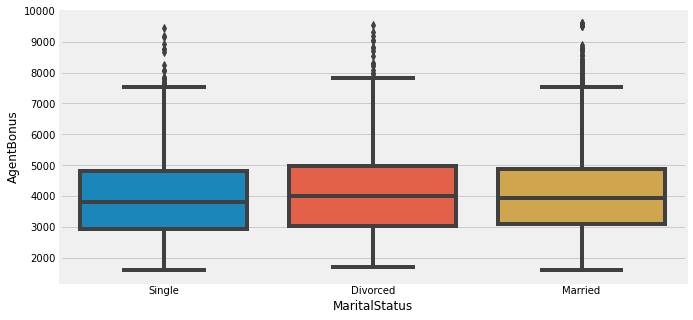


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. ZONE


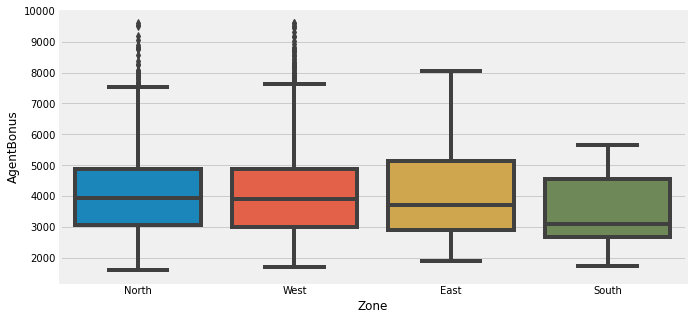


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. PAYMENTMETHOD


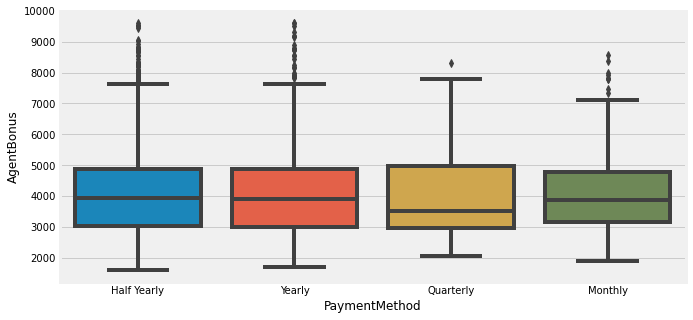


--------------------------------------------------------------------------------------------------


In [326]:
bivariate_analysis(insurance_df)

**>> Dropping CustID**

In [327]:
insurance_df.drop(['CustID'], axis=1, inplace=True)

**ENCODING STRING VALUES**

In [328]:
insurance_df[obj_cols].head(3)

,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone,PaymentMethod
0,Agent,Salaried,Graduate,Female,Manager,Single,North,Half Yearly
1,Third Party Partner,Salaried,Graduate,Male,Manager,Divorced,North,Yearly
2,Agent,Free Lancer,Post Graduate,Male,Executive,Single,North,Yearly


***>>> Ordinal Varaibles***

In [329]:
ordinal_cols = ['EducationField', 'Designation']

education_mapping = {'Diploma': 0, 'Under Graduate': 1,'Graduate': 2, 'Post Graduate': 3}
designation_mapping = {'Executive': 0, 'Manager': 1, 'Senior Manager': 2, 'AVP': 3, 'VP': 4}


mappings = [education_mapping, designation_mapping]

for col, mapping in zip(ordinal_cols, mappings):
    insurance_df[col] = insurance_df[col].replace(mapping)
    
insurance_df[['EducationField', 'Designation']].head(3)    

,EducationField,Designation
0,2,1
1,2,1
2,3,0


In [330]:
insurance_df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,Salaried,2,Female,3,1,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,2,Male,4,1,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,4273,26.0,4.0,Agent,Free Lancer,3,Male,4,0,3.0,Single,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,1791,11.0,NaN,Third Party Partner,Salaried,2,Female,3,0,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,2955,6.0,NaN,Agent,Small Business,1,Male,3,0,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


***>>> Nominal Variables*** 

In [331]:
nominal_cols = ['Channel','Occupation','Gender','MaritalStatus','Zone','PaymentMethod']

insurance_df = pd.get_dummies(data=insurance_df, columns=nominal_cols, drop_first=True)
insurance_df.head()

,AgentBonus,Age,CustTenure,EducationField,ExistingProdType,Designation,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,...,Occupation_Small Business,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4409,22.0,4.0,2,3,1,2.0,20993.0,1,2.0,...,0,0,0,1,1,0,0,0,0,0
1,2214,11.0,2.0,2,4,1,4.0,20130.0,0,3.0,...,0,1,0,0,1,0,0,0,0,1
2,4273,26.0,4.0,3,4,0,3.0,17090.0,1,2.0,...,0,1,0,1,1,0,0,0,0,1
3,1791,11.0,NaN,2,3,0,3.0,17909.0,1,2.0,...,0,0,0,0,0,0,1,0,0,0
4,2955,6.0,NaN,1,3,0,4.0,18468.0,0,4.0,...,1,1,0,0,0,0,1,0,0,0


**MISSING VALUES TREATMENT**

In [332]:
null_df.head(7)

,Null_%
Age,5.951327
MonthlyIncome,5.221239
CustTenure,5.000000
ExistingPolicyTenure,4.070796
SumAssured,3.407080
CustCareScore,1.150442
NumberOfPolicy,0.995575


In [333]:
insurance_df['Age'] = insurance_df['Age'].fillna(insurance_df.Age.median())
insurance_df['CustCareScore'] = insurance_df['CustCareScore'].fillna(insurance_df['CustCareScore'].mode()[0])
insurance_df['NumberOfPolicy'] = insurance_df['NumberOfPolicy'].fillna(insurance_df['NumberOfPolicy'].mode()[0])
insurance_df['CustTenure'] = insurance_df['CustTenure'].fillna(insurance_df['CustTenure'].mode()[0])
insurance_df['ExistingPolicyTenure'] = insurance_df['ExistingPolicyTenure'].fillna(insurance_df['ExistingPolicyTenure'].mode()[0])

In [334]:
insurance_df.isnull().sum()

AgentBonus                       0
Age                              0
CustTenure                       0
EducationField                   0
ExistingProdType                 0
Designation                      0
NumberOfPolicy                   0
MonthlyIncome                  236
Complaint                        0
ExistingPolicyTenure             0
SumAssured                     154
LastMonthCalls                   0
CustCareScore                    0
Channel_Online                   0
Channel_Third Party Partner      0
Occupation_Large Business        0
Occupation_Salaried              0
Occupation_Small Business        0
Gender_Male                      0
MaritalStatus_Married            0
MaritalStatus_Single             0
Zone_North                       0
Zone_South                       0
Zone_West                        0
PaymentMethod_Monthly            0
PaymentMethod_Quarterly          0
PaymentMethod_Yearly             0
dtype: int64

In [335]:
knn_imputer = KNNImputer(n_neighbors=10)
insurance_df1 = insurance_df.copy()

insurance_df1 = pd.DataFrame(knn_imputer.fit_transform(insurance_df1), columns=insurance_df1.columns)
insurance_df1.isnull().sum().sum()

0

In [336]:
insurance_df1.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'EducationField', 'ExistingProdType',
       'Designation', 'NumberOfPolicy', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore',
       'Channel_Online', 'Channel_Third Party Partner',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'Gender_Male', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Zone_North', 'Zone_South', 'Zone_West',
       'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly'],
      dtype='object')

In [337]:
insurance_df1.columns = insurance_df1.columns.str.replace(' ','_')
insurance_df1.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'EducationField', 'ExistingProdType',
       'Designation', 'NumberOfPolicy', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore',
       'Channel_Online', 'Channel_Third_Party_Partner',
       'Occupation_Large_Business', 'Occupation_Salaried',
       'Occupation_Small_Business', 'Gender_Male', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Zone_North', 'Zone_South', 'Zone_West',
       'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly'],
      dtype='object')

**OUTLIER TREATMENT**

For now, outlier treatment will not be done. The model will be tested without outlier treatment and then with outlier treatment.

Outlier treatmemt can be done as below if needed:

Replace very low values with the 25th quantile and very high values with the 75th quantile

In [338]:
# Checking how many outliers
Q1, Q3 = insurance_df1.quantile(0.25), insurance_df1.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

In [339]:
outliers_df = pd.DataFrame({'Outliers_%':((insurance_df1<lower) | (insurance_df1>upper)).sum()/insurance_df1.index.size*100}).sort_values('Outliers_%',ascending=False)
outliers_df

,Outliers_%
Channel_Third_Party_Partner,18.982301
Channel_Online,10.353982
Occupation_Large_Business,9.026549
MonthlyIncome,8.384956
PaymentMethod_Monthly,7.831858
ExistingProdType,6.769912
ExistingPolicyTenure,4.137168
Age,2.323009
SumAssured,2.212389
AgentBonus,2.212389


**HEATMAP**

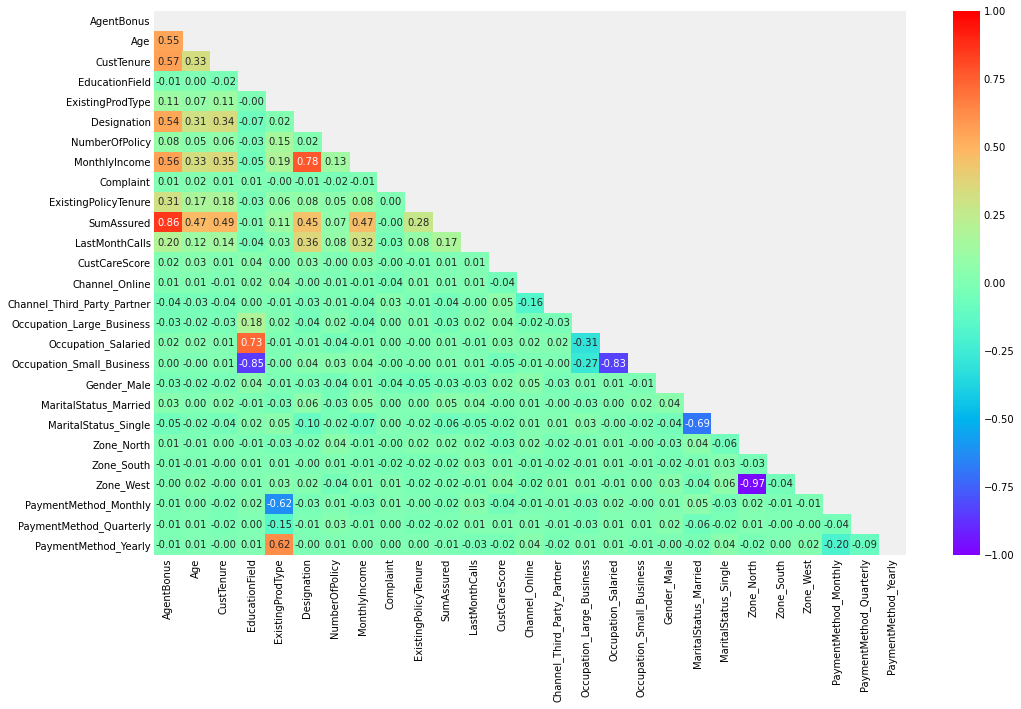

In [297]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(insurance_df1.corr(method='pearson')))
sns.heatmap(insurance_df1.corr(), mask=mask, fmt = '.2f', annot=True, vmin=-1, vmax=1, cmap='rainbow');

**MULTICOLLINEARITY CHECK**

In [298]:
vif_df = pd.DataFrame()
X_Data = insurance_df1.drop('AgentBonus',axis=1)
vif_df['Variable'] = X_Data.columns
vif_df['VIF'] = [variance_inflation_factor(X_Data.values, i) for i in range(X_Data.shape[1])]
vif_df = vif_df.sort_values('VIF',ascending=False).reset_index().drop('index',axis=1)
vif_df[vif_df.VIF>5]

,Variable,VIF
0,MonthlyIncome,74.544130
1,Occupation_Salaried,74.458134
2,ExistingProdType,56.516442
3,Occupation_Small_Business,56.038414
4,Zone_West,40.299046
5,Zone_North,29.812966
6,EducationField,17.689012
7,Occupation_Large_Business,14.354769
8,SumAssured,13.061273
9,NumberOfPolicy,7.762558


**DATA SPLIT**

In [299]:
X = insurance_df1.drop(['AgentBonus'],axis=1)
y = insurance_df1['AgentBonus']

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [301]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3164, 1356, 3164, 1356)

**SCALING PREDICTORS**

In [240]:
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [241]:
X_train.head()

,Age,CustTenure,EducationField,ExistingProdType,Designation,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,...,Occupation_Small_Business,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
3894,2.809144,0.659388,0.571621,0.294954,1.688625,-1.100113,2.386470,-0.634415,-0.898020,2.491072,...,-0.842227,-1.215599,-1.0,1.439390,-0.848272,-0.035578,0.875563,-0.289712,-0.130523,-0.682768
3482,-0.967877,2.210956,-0.710171,0.294954,-0.080224,1.681711,0.029128,1.576256,0.889545,0.156262,...,1.187328,-1.215599,-1.0,1.439390,1.178867,-0.035578,-1.142122,-0.289712,-0.130523,-0.682768
4152,-0.166691,1.213520,0.571621,1.281459,-0.964649,-1.100113,-0.355940,-0.634415,-0.600092,-0.682618,...,-0.842227,-1.215599,-1.0,1.439390,1.178867,-0.035578,-1.142122,-0.289712,-0.130523,1.464626
4013,1.206771,0.105257,-0.710171,0.294954,0.804200,0.986255,0.925783,-0.634415,-0.600092,0.809250,...,1.187328,0.822639,1.0,-0.694739,1.178867,-0.035578,-1.142122,-0.289712,-0.130523,-0.682768
748,-1.425698,-1.113832,0.571621,-0.691551,-0.964649,-0.404657,-0.900993,1.576256,-0.898020,-0.727858,...,-0.842227,-1.215599,1.0,-0.694739,-0.848272,-0.035578,0.875563,-0.289712,-0.130523,-0.682768
